In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import openpyxl

In [44]:
train_df=pd.read_excel("train_data.xlsx")
test_df=pd.read_excel("test_data.xlsx")

In [45]:
X_train = train_df.iloc[:, :767]  
y_train = train_df['Label']     
X_test = test_df.iloc[:, :767]  
y_test = test_df['Label']     

In [79]:
model = tf.keras.Sequential([
    layers.Input(shape=(767,)),          
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'),  
    layers.Dense(len(y_train.unique()), activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │          98,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,950 (417.77 KB)

 Trainable params: 106,950 (417.77 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Обчислення ваг для кожного класу
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))


In [81]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6039 - loss: 2.0450 - val_accuracy: 0.5339 - val_loss: 1.3644
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4411 - loss: 2.1069 - val_accuracy: 0.5345 - val_loss: 1.2517
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5451 - loss: 0.9515 - val_accuracy: 0.2156 - val_loss: 1.6365
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4955 - loss: 0.8276 - val_accuracy: 0.4400 - val_loss: 1.2354
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5332 - loss: 0.6411 - val_accuracy: 0.7056 - val_loss: 0.7750
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6393 - loss: 0.6021 - val_accuracy: 0.5866 - val_loss: 1.1230
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6262 - loss: 0.3914 - val_accuracy: 0.5809 - val_loss: 1.0770
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6668 - loss: 0.2982 - val_accuracy: 0.

In [63]:
model.save("model.h5")

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
unique_labels = ['Заперечення', 'Виправдовування', 'Заклик', 'Розпалювання ворожнечі та ненависті', 'Приниження національної честі та гідності', 'Просто текст']

def evaluate_model(model, X_test, y_test, class_labels=None):
    # Передбачення класів
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    figsize=(10, 8)
    cm=confusion_matrix(y_test, y_pred)   
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_labels))


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


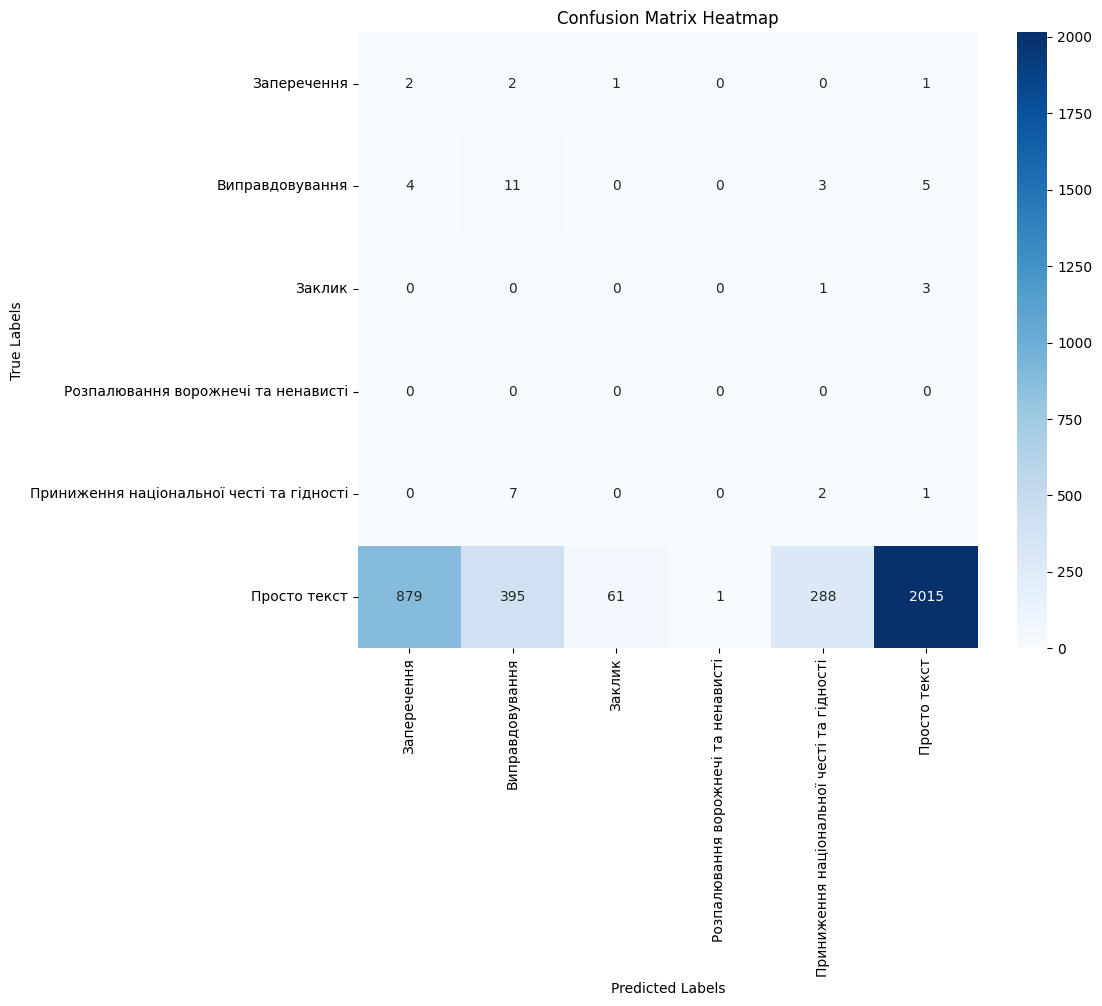


Classification Report:
                                           precision    recall  f1-score   support

                              Заперечення       0.00      0.33      0.00         6
                          Виправдовування       0.03      0.48      0.05        23
                                   Заклик       0.00      0.00      0.00         4
      Розпалювання ворожнечі та ненависті       0.00      0.00      0.00         0
Приниження національної честі та гідності       0.01      0.20      0.01        10
                             Просто текст       1.00      0.55      0.71      3639

                                 accuracy                           0.55      3682
                                macro avg       0.17      0.26      0.13      3682
                             weighted avg       0.98      0.55      0.70      3682



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [87]:
#unique_labels = list(np.unique(y_test))
#print(unique_labels)
evaluate_model(model, X_test, y_test, class_labels=[str(label) for label in unique_labels])
